In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
from matplotlib.colors import to_rgb, to_hex
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2  # Import venn2 for Venn diagrams

In [3]:
# Load the Excel file
file_path = r"C:\Users\sjs93\Downloads\cell_counts_full (2).xlsx"
excel_file = pd.ExcelFile(file_path)

# Load both sheets into separate DataFrames
sheet1 = pd.read_excel(file_path, sheet_name='full_focus1')
sheet2 = pd.read_excel(file_path, sheet_name='full_focus2')

# Rename columns for consistency
sheet1.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]
sheet2.columns = ["Slice", "Count", "Total Area", "Average Size", "%Area", "Mean", "Perim.", "Threshold"]

# Drop the 'Threshold' column
sheet1 = sheet1.drop(columns=['Threshold', 'Total Area', "Average Size", "%Area", "Mean", "Perim."])
sheet2 = sheet2.drop(columns=['Threshold', 'Total Area', "Average Size", "%Area", "Mean", "Perim."])

sheet1['Slice'] = sheet1['Slice'].str.lower()
sheet2['Slice'] = sheet2['Slice'].str.lower()

# Define subject-specific mappings for Channel in full_focus1 = 10 mins fam condition 
subject_mappings_full_focus1 = {
    '2_1': {'gfp': 'NAc', 'mcherry': 'MD'},
    '2_2': {'gfp': 'NAc', 'mcherry': 'MD'},
    '2_3': {'gfp': 'NAc', 'mcherry': 'MD'},
    '1_2': {'gfp': 'MD', 'mcherry': 'NAc'},
    '1_3': {'gfp': 'MD', 'mcherry': 'NAc'}
}

# Define the default mapping for full_focus2 = cagemate condition 
default_mapping_full_focus2 = {'gfp': 'MD', 'mcherry': 'NAc'}

# Function to extract markers from Slice and create projector label
def create_projector(slice_value, subject, sheet_name):
    markers = []
    if 'cfos' in slice_value:
        markers.append('cfos')
    if 'gfp' in slice_value:
        markers.append('gfp')
    if 'mcherry' in slice_value:
        markers.append('mcherry')

    if sheet_name == 'full_focus1' and subject in subject_mappings_full_focus1:
        region_mapping = subject_mappings_full_focus1[subject]
    else:
        region_mapping = default_mapping_full_focus2

    combined_markers = []
    for marker in markers:
        if marker in ['gfp', 'mcherry']:
            region = region_mapping.get(marker, 'Unknown')
            combined_markers.append(region)
        else:
            combined_markers.append(marker)
    
    # Sort combined markers alphabetically to ensure consistent ordering
    combined_markers.sort()
    
    return '+'.join(combined_markers) + '+'

# Function to extract the subject number from the Slice column
def extract_subject(slice_value):
    parts = slice_value.split('_')
    if len(parts) >= 3:
        return parts[1] + '_' + parts[2]  # Assuming the subject number is in the 2nd and 3rd position
    return 'Unknown'  # In case the slice format is unexpected

# Function to extract the region information from the Slice column
def extract_region(slice_value):
    parts = slice_value.split('_')
    if len(parts) >= 4:
        return parts[3]  # Assuming the region information is in the 4th position
    return 'Unknown'  # In case the slice format is unexpected

# Process the data for both sheets
def process_data(df, sheet_name, condition):
    df['Slice'] = df['Slice'].astype(str)
    df['Subject'] = df['Slice'].apply(extract_subject)  # Extract the subject number
    df['Region'] = df['Slice'].apply(extract_region)    # Extract the region information
    df['Projector'] = df.apply(lambda row: create_projector(row['Slice'], row['Subject'], sheet_name), axis=1)
    df['Condition'] = condition  # Add condition column
    return df

# Apply the updated function to both sheets
sheet1_processed = process_data(sheet1, 'full_focus1', '10 min fam')
sheet2_processed = process_data(sheet2, 'full_focus2', 'cagemate')

# Extract base region for both processed DataFrames
sheet1_processed['Base region'] = sheet1_processed['Region'].apply(lambda x: x[1:])
sheet2_processed['Base region'] = sheet2_processed['Region'].apply(lambda x: x[1:])

# Combine the two processed DataFrames
combined_df = pd.concat([sheet1_processed, sheet2_processed], ignore_index=True)
combined_df


,Slice,Count,Subject,Region,Projector,Condition,Base region
0,ff_2_2_aacc_1_1_cfos.png,96,2_2,aacc,cfos+,10 min fam,acc
1,ff_2_2_aacc_1_1_gfp.png,96,2_2,aacc,NAc+,10 min fam,acc
2,ff_2_2_aacc_1_1_mcherry.png,100,2_2,aacc,MD+,10 min fam,acc
3,ff_2_2_aacc_1_1_mcherry_gfp.png,39,2_2,aacc,MD+NAc+,10 min fam,acc
4,ff_2_2_aacc_1_1_mcherry_gfp_cfos.png,40,2_2,aacc,MD+NAc+cfos+,10 min fam,acc
...,...,...,...,...,...,...,...
485,ff_3_3_pil_5_2_mcherry.png,133,3_3,pil,NAc+,cagemate,il
486,ff_3_3_pil_5_2_cfos_mcherry.png,85,3_3,pil,NAc+cfos+,cagemate,il
487,ff_3_3_pil_5_2_cfos_gfp.png,60,3_3,pil,MD+cfos+,cagemate,il
488,ff_3_3_pil_5_2_mcherry_gfp.png,53,3_3,pil,MD+NAc+,cagemate,il


In [4]:
# Assuming 'combined_df' is your DataFrame
# Drop the 'Slice' and 'Region' columns
combined_df_dropped = combined_df.drop(columns=['Slice', 'Region'])

combined_df

,Slice,Count,Subject,Region,Projector,Condition,Base region
0,ff_2_2_aacc_1_1_cfos.png,96,2_2,aacc,cfos+,10 min fam,acc
1,ff_2_2_aacc_1_1_gfp.png,96,2_2,aacc,NAc+,10 min fam,acc
2,ff_2_2_aacc_1_1_mcherry.png,100,2_2,aacc,MD+,10 min fam,acc
3,ff_2_2_aacc_1_1_mcherry_gfp.png,39,2_2,aacc,MD+NAc+,10 min fam,acc
4,ff_2_2_aacc_1_1_mcherry_gfp_cfos.png,40,2_2,aacc,MD+NAc+cfos+,10 min fam,acc
...,...,...,...,...,...,...,...
485,ff_3_3_pil_5_2_mcherry.png,133,3_3,pil,NAc+,cagemate,il
486,ff_3_3_pil_5_2_cfos_mcherry.png,85,3_3,pil,NAc+cfos+,cagemate,il
487,ff_3_3_pil_5_2_cfos_gfp.png,60,3_3,pil,MD+cfos+,cagemate,il
488,ff_3_3_pil_5_2_mcherry_gfp.png,53,3_3,pil,MD+NAc+,cagemate,il


In [5]:
# Step 1: Filter the DataFrame for the ACC region and cagemate condition
acc_cagemate_df = combined_df[
    (combined_df['Base region'] == 'acc') & 
    (combined_df['Condition'] == 'cagemate')
]

# Step 2: Group by Projector and sum the counts
acc_cagemate_counts = acc_cagemate_df.groupby('Projector')['Count'].sum().reset_index()

# Step 3: Rename the columns for clarity
acc_cagemate_counts.columns = ['Projector', 'Total Count']

acc_cagemate_counts


,Projector,Total Count
0,MD+,1082
1,MD+NAc+,667
2,MD+NAc+cfos+,670
3,MD+cfos+,900
4,NAc+,1052
5,NAc+cfos+,712
6,cfos+,1227


In [10]:
# Step 1: Filter the DataFrame for the ACC region and cagemate condition
pl_cagemate_df = combined_df[
    (combined_df['Base region'] == 'pl') & 
    (combined_df['Condition'] == 'cagemate')
]

# Step 2: Group by Projector and sum the counts
pl_cagemate_counts = pl_cagemate_df.groupby('Projector')['Count'].sum().reset_index()

# Step 3: Rename the columns for clarity
pl_cagemate_counts.columns = ['Projector', 'Total Count']

pl_cagemate_counts


,Projector,Total Count
0,MD+,796
1,MD+NAc+,638
2,MD+NAc+cfos+,671
3,MD+cfos+,653
4,NAc+,1349
5,NAc+cfos+,835
6,cfos+,1057


In [17]:
# Step 1: Filter the DataFrame for the ACC region and cagemate condition
il_cagemate_df = combined_df[
    (combined_df['Base region'] == 'il') & 
    (combined_df['Condition'] == 'cagemate')
]

# Step 2: Group by Projector and sum the counts
il_cagemate_counts = il_cagemate_df.groupby('Projector')['Count'].sum().reset_index()

# Step 3: Rename the columns for clarity
il_cagemate_counts.columns = ['Projector', 'Total Count']

il_cagemate_counts


,Projector,Total Count
0,MD+,1573
1,MD+NAc+,1073
2,MD+NAc+cfos+,1082
3,MD+cfos+,1233
4,NAc+,2398
5,NAc+cfos+,1532
6,cfos+,2025


In [18]:
# Step 1: Filter the DataFrame for the ACC region and 10 min fam condition
acc_10minfam_df = combined_df[
    (combined_df['Base region'] == 'acc') & 
    (combined_df['Condition'] == '10 min fam')
]

# Step 2: Group by Projector and sum the counts
acc_10minfam_counts = acc_10minfam_df.groupby('Projector')['Count'].sum().reset_index()

# Step 3: Rename the columns for clarity
acc_10minfam_counts.columns = ['Projector', 'Total Count']

# Display the resulting DataFrame
acc_10minfam_counts


,Projector,Total Count
0,MD+,3930
1,MD+NAc+,2874
2,MD+NAc+cfos+,2664
3,MD+cfos+,2767
4,NAc+,3442
5,NAc+cfos+,2797
6,cfos+,2883


In [12]:
# Step 1: Filter the DataFrame for the ACC region and 10 min fam condition
pl_10minfam_df = combined_df[
    (combined_df['Base region'] == 'pl') & 
    (combined_df['Condition'] == '10 min fam')
]

# Step 2: Group by Projector and sum the counts
pl_10minfam_counts = pl_10minfam_df.groupby('Projector')['Count'].sum().reset_index()

# Step 3: Rename the columns for clarity
pl_10minfam_counts.columns = ['Projector', 'Total Count']

# Display the resulting DataFrame
pl_10minfam_counts


,Projector,Total Count
0,MD+,1965
1,MD+NAc+,1560
2,MD+NAc+cfos+,1489
3,MD+cfos+,1530
4,NAc+,1816
5,NAc+cfos+,1594
6,cfos+,1593


In [20]:
# Step 1: Filter the DataFrame for the ACC region and 10 min fam condition
il_10minfam_df = combined_df[
    (combined_df['Base region'] == 'il') & 
    (combined_df['Condition'] == '10 min fam')
]

# Step 2: Group by Projector and sum the counts
il_10minfam_counts = il_10minfam_df.groupby('Projector')['Count'].sum().reset_index()

# Step 3: Rename the columns for clarity
il_10minfam_counts.columns = ['Projector', 'Total Count']

# Display the resulting DataFrame
il_10minfam_counts

,Projector,Total Count
0,MD+,5437
1,MD+NAc+,4425
2,MD+NAc+cfos+,4214
3,MD+cfos+,4370
4,NAc+,5500
5,NAc+cfos+,4866
6,cfos+,4519


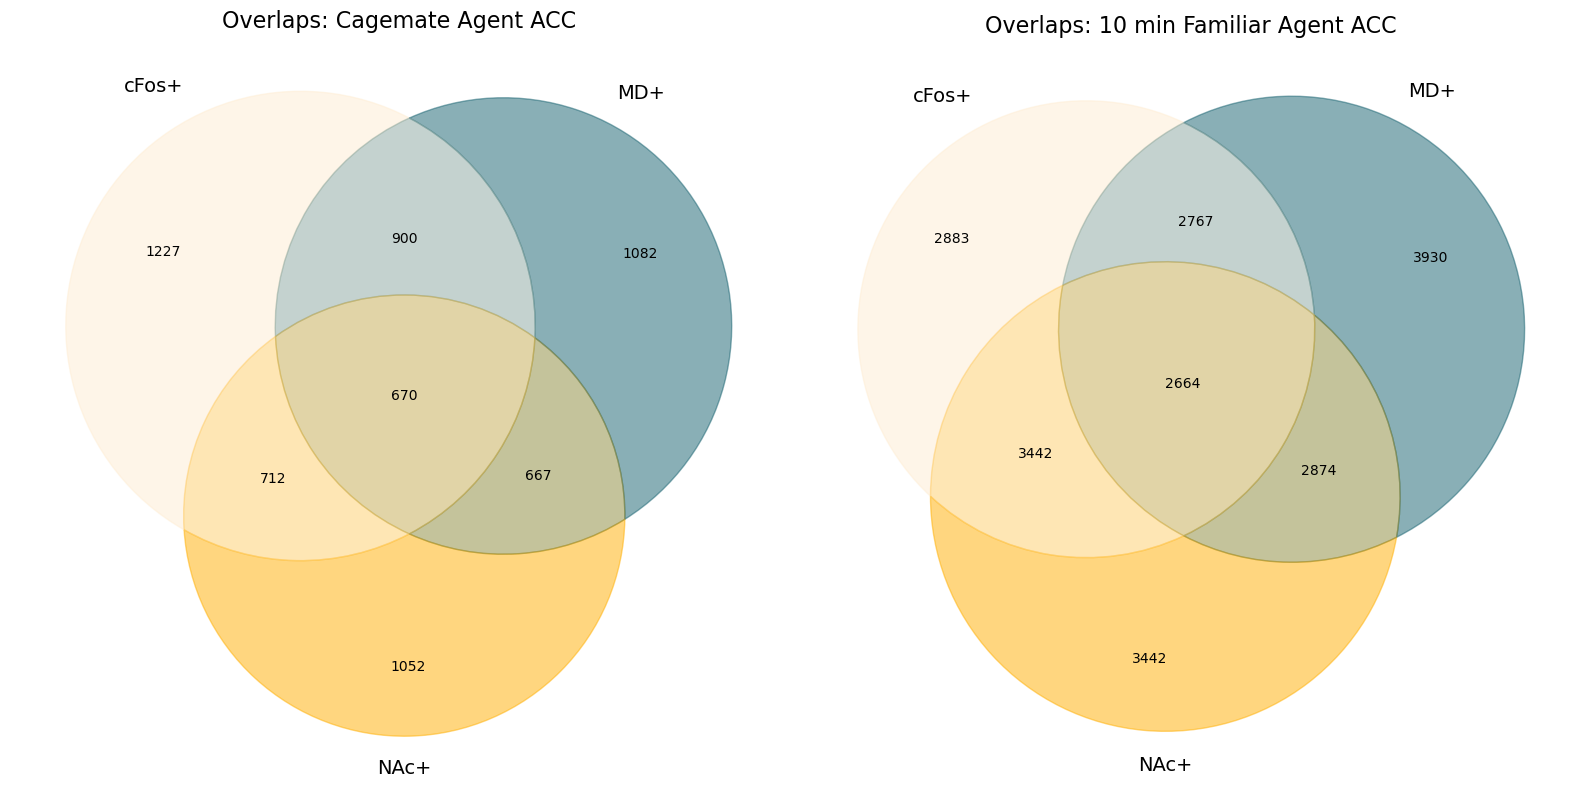

In [7]:
# Define a function to blend two colors
def blend_colors(color1, color2, ratio=0.5):
    rgb1 = to_rgb(color1)
    rgb2 = to_rgb(color2)
    blended_rgb = [ratio * c1 + (1 - ratio) * c2 for c1, c2 in zip(rgb1, rgb2)]
    return to_hex(blended_rgb)

# Function to plot the Venn diagram
def plot_venn_diagram(ax, counts, title, labels, colors):
    # Unpack the counts
    cfos_only, md_only, nac_only, md_cfos, nac_cfos, md_nac, md_nac_cfos = counts

    # Define the subset sizes
    subset_sizes = {
        '100': cfos_only,        # Only cFos
        '010': md_only,          # Only MD
        '001': nac_only,         # Only NAc
        '110': md_cfos,          # MD + cFos
        '101': nac_cfos,         # NAc + cFos
        '011': md_nac,           # MD + NAc
        '111': md_nac_cfos       # MD + NAc + cFos
    }

    # Plot the Venn diagram
    venn = venn3(subsets=subset_sizes, set_labels=labels, ax=ax)

    # Assign colors to the regions
    color_map = {
        '100': colors[0],  # cFos
        '010': colors[1],  # MD
        '001': colors[2],  # NAc
        '110': blend_colors(colors[0], colors[1]),  # cFos + MD
        '101': blend_colors(colors[0], colors[2]),  # cFos + NAc
        '011': blend_colors(colors[1], colors[2]),  # MD + NAc
        '111': blend_colors(blend_colors(colors[0], colors[1]), colors[2])  # cFos + MD + NAc
    }

    for subset, color in color_map.items():
        if venn.get_patch_by_id(subset):
            venn.get_patch_by_id(subset).set_color(color)
            venn.get_patch_by_id(subset).set_alpha(0.5)
    
    ax.set_title(title)

# Increase title size
    ax.set_title(title, fontsize=16)  # Set the title font size

    # Set legend text size
    for label in venn.set_labels:
        if label is not None:
            label.set_fontsize(14)  # Set the label font size

# Define the specific colors (hex codes)
colors = ['#FEEDD3', '#15616F', '#FFAF00']  # cFos, MD, NAc respectively

# Counts for "Cagemate Agent"
cagemate_counts = (
    1227,  # Only cFos+
    1082,  # Only MD+
    1052,  # Only NAc+
    900,   # MD + cFos+
    712,   # NAc + cFos+
    667,   # MD + NAc+
    670    # MD + NAc + cFos+
)

# Counts for "10 min Familiar Agent"
familiar_counts = (
    2883,  # Only cFos+
    3930,  # Only MD+
    3442,  # Only NAc+
    2767,  # MD + cFos+
    3442,  # NAc + cFos+
    2874,  # MD + NAc+
    2664   # MD + NAc + cFos+
)

# Create subplots to place them side by side for comparison
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the Venn diagram for "Cagemate Agent"
plot_venn_diagram(
    ax=axs[0],
    counts=cagemate_counts, 
    title="Overlaps: Cagemate Agent ACC", 
    labels=('cFos+', 'MD+', 'NAc+'),
    colors=colors
)

# Plot the Venn diagram for "10 min Familiar Agent"
plot_venn_diagram(
    ax=axs[1],
    counts=familiar_counts, 
    title="Overlaps: 10 min Familiar Agent ACC", 
    labels=('cFos+', 'MD+', 'NAc+'),
    colors=colors
)

plt.tight_layout()
plt.show()


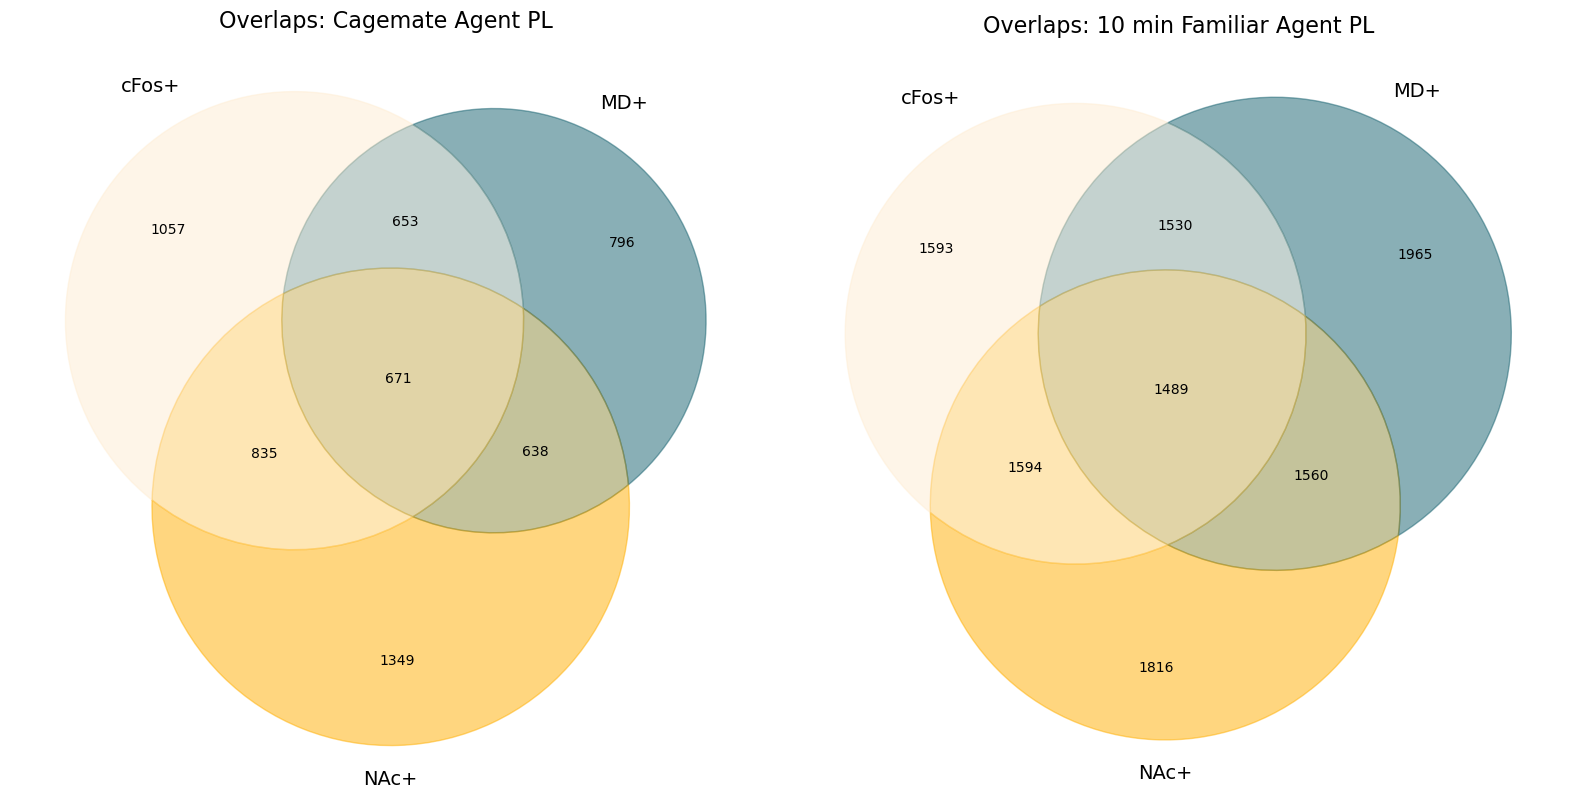

In [14]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib.colors import to_rgb, to_hex

# Function to blend two colors
def blend_colors(color1, color2, ratio=0.5):
    rgb1 = to_rgb(color1)
    rgb2 = to_rgb(color2)
    blended_rgb = [ratio * c1 + (1 - ratio) * c2 for c1, c2 in zip(rgb1, rgb2)]
    return to_hex(blended_rgb)

# Function to plot Venn diagram
def plot_venn_diagram(ax, counts, title, labels, colors):
    # Unpack the counts
    cfos_only, md_only, nac_only, md_cfos, nac_cfos, md_nac, md_nac_cfos = counts

    # Define the subset sizes
    subset_sizes = {
        '100': cfos_only,        # Only cFos
        '010': md_only,          # Only MD
        '001': nac_only,         # Only NAc
        '110': md_cfos,          # MD + cFos
        '101': nac_cfos,         # NAc + cFos
        '011': md_nac,           # MD + NAc
        '111': md_nac_cfos       # MD + NAc + cFos
    }

    # Plot the Venn diagram
    venn = venn3(subsets=subset_sizes, set_labels=labels, ax=ax)

    # Assign colors to the regions
    color_map = {
        '100': colors[0],  # cFos
        '010': colors[1],  # MD
        '001': colors[2],  # NAc
        '110': blend_colors(colors[0], colors[1]),  # cFos + MD
        '101': blend_colors(colors[0], colors[2]),  # cFos + NAc
        '011': blend_colors(colors[1], colors[2]),  # MD + NAc
        '111': blend_colors(blend_colors(colors[0], colors[1]), colors[2])  # cFos + MD + NAc
    }

    for subset, color in color_map.items():
        if venn.get_patch_by_id(subset):
            venn.get_patch_by_id(subset).set_color(color)
            venn.get_patch_by_id(subset).set_alpha(0.5)

    # Increase title size
    ax.set_title(title, fontsize=16)  # Set the title font size


    ax.set_title(title, fontsize=16)
    for text in venn.set_labels:
        text.set_fontsize(14)

# Define the specific colors (hex codes)
colors = ['#FEEDD3', '#15616F', '#FFAF00']  # cFos, MD, NAc respectively

# Counts for "Cagemate Agent" in PL region
cagemate_counts = (
    1057,  # Only cFos+
    796,   # Only MD+
    1349,  # Only NAc+
    653,   # MD + cFos+
    835,   # NAc + cFos+
    638,   # MD + NAc+
    671    # MD + NAc + cFos+
)

# Counts for "10 min Familiar Agent" in PL region
familiar_counts = (
    1593,  # Only cFos+
    1965,  # Only MD+
    1816,  # Only NAc+
    1530,  # MD + cFos+
    1594,  # NAc + cFos+
    1560,  # MD + NAc+
    1489   # MD + NAc + cFos+
)

# Create subplots to place them side by side for comparison
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the Venn diagram for "Cagemate Agent"
plot_venn_diagram(
    ax=axs[0],
    counts=cagemate_counts, 
    title="Overlaps: Cagemate Agent PL", 
    labels=('cFos+', 'MD+', 'NAc+'),
    colors=colors
)

# Plot the Venn diagram for "10 min Familiar Agent"
plot_venn_diagram(
    ax=axs[1],
    counts=familiar_counts, 
    title="Overlaps: 10 min Familiar Agent PL", 
    labels=('cFos+', 'MD+', 'NAc+'),
    colors=colors
)

plt.tight_layout()
plt.show()


In [16]:
pl_10minfam_counts
pl_cagemate_counts

,Projector,Total Count
0,MD+,796
1,MD+NAc+,638
2,MD+NAc+cfos+,671
3,MD+cfos+,653
4,NAc+,1349
5,NAc+cfos+,835
6,cfos+,1057


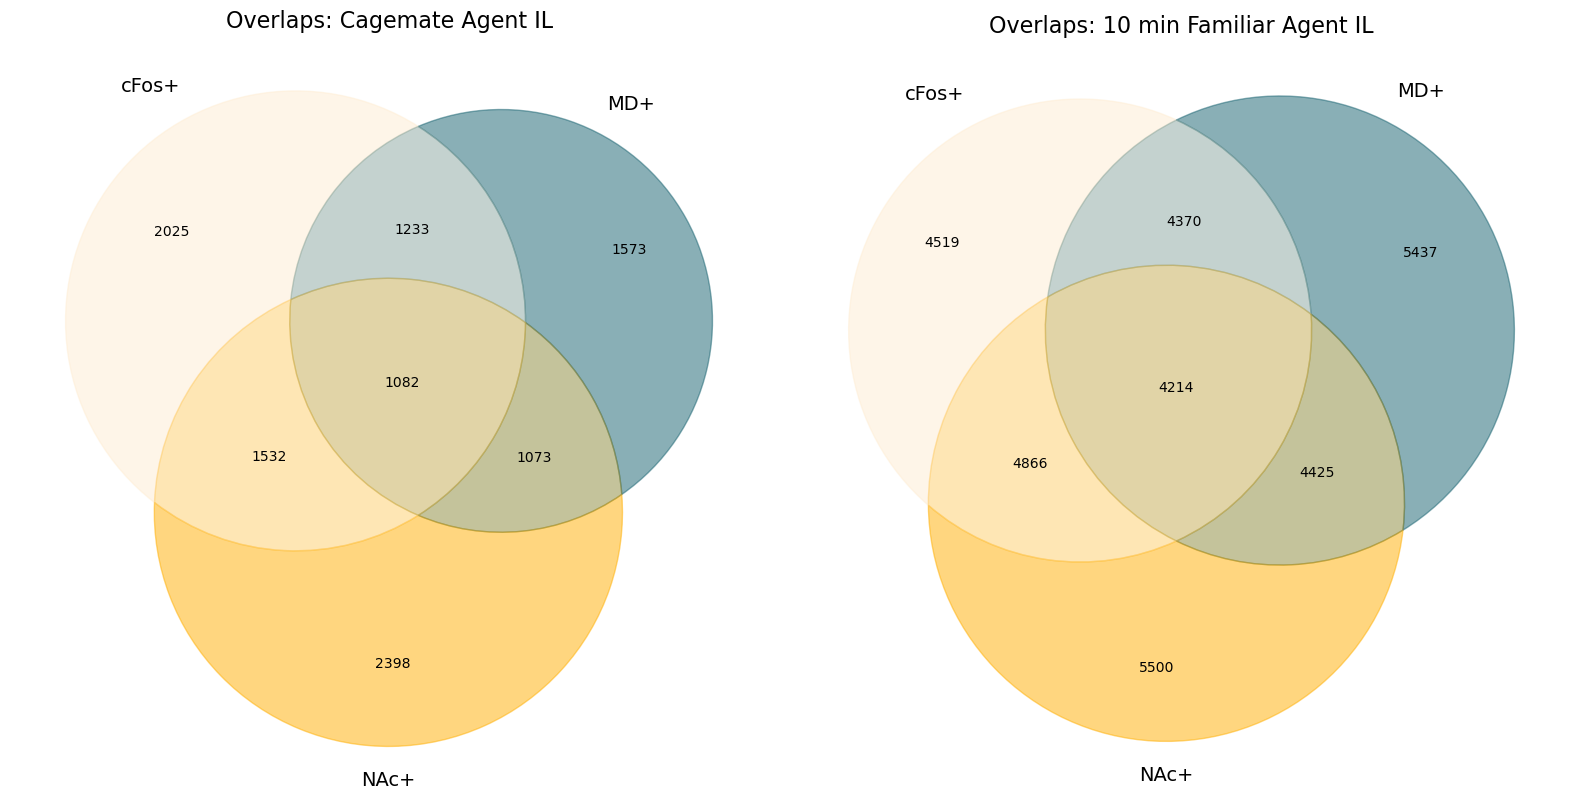

: 

In [25]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib.colors import to_rgb, to_hex

# Function to blend two colors
def blend_colors(color1, color2, ratio=0.5):
    rgb1 = to_rgb(color1)
    rgb2 = to_rgb(color2)
    blended_rgb = [ratio * c1 + (1 - ratio) * c2 for c1, c2 in zip(rgb1, rgb2)]
    return to_hex(blended_rgb)

# Function to plot Venn diagram
def plot_venn_diagram(ax, counts, title, labels, colors):
    # Unpack the counts
    cfos_only, md_only, nac_only, md_cfos, nac_cfos, md_nac, md_nac_cfos = counts

    # Define the subset sizes
    subset_sizes = {
        '100': cfos_only,        # Only cFos
        '010': md_only,          # Only MD
        '001': nac_only,         # Only NAc
        '110': md_cfos,          # MD + cFos
        '101': nac_cfos,         # NAc + cFos
        '011': md_nac,           # MD + NAc
        '111': md_nac_cfos       # MD + NAc + cFos
    }

    # Plot the Venn diagram
    venn = venn3(subsets=subset_sizes, set_labels=labels, ax=ax)

    # Assign colors to the regions
    color_map = {
        '100': colors[0],  # cFos
        '010': colors[1],  # MD
        '001': colors[2],  # NAc
        '110': blend_colors(colors[0], colors[1]),  # cFos + MD
        '101': blend_colors(colors[0], colors[2]),  # cFos + NAc
        '011': blend_colors(colors[1], colors[2]),  # MD + NAc
        '111': blend_colors(blend_colors(colors[0], colors[1]), colors[2])  # cFos + MD + NAc
    }

    for subset, color in color_map.items():
        if venn.get_patch_by_id(subset):
            venn.get_patch_by_id(subset).set_color(color)
            venn.get_patch_by_id(subset).set_alpha(0.5)
# Increase title size
    ax.set_title(title, fontsize=16)  # Set the title font size
    ax.set_title(title, fontsize=16)
    for text in venn.set_labels:
        text.set_fontsize(14)

# Define the specific colors (hex codes)
colors = ['#FEEDD3', '#15616F', '#FFAF00']  # cFos, MD, NAc respectively

# Counts for "Cagemate Agent" in IL region
cagemate_counts = (
    2025,  # Only cFos+
    1573,  # Only MD+
    2398,  # Only NAc+
    1233,  # MD + cFos+
    1532,  # NAc + cFos+
    1073,  # MD + NAc+
    1082   # MD + NAc + cFos+
)

# Counts for "10 min Familiar Agent" in IL region
familiar_counts = (
    4519,  # Only cFos+
    5437,  # Only MD+
    5500,  # Only NAc+
    4370,  # MD + cFos+
    4866,  # NAc + cFos+
    4425,  # MD + NAc+
    4214   # MD + NAc + cFos+
)

# Create subplots to place them side by side for comparison
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the Venn diagram for "Cagemate Agent"
plot_venn_diagram(
    ax=axs[0],
    counts=cagemate_counts, 
    title="Overlaps: Cagemate Agent IL", 
    labels=('cFos+', 'MD+', 'NAc+'),
    colors=colors
)

# Plot the Venn diagram for "10 min Familiar Agent"
plot_venn_diagram(
    ax=axs[1],
    counts=familiar_counts, 
    title="Overlaps: 10 min Familiar Agent IL", 
    labels=('cFos+', 'MD+', 'NAc+'),
    colors=colors
)

plt.tight_layout()
plt.show()


In [24]:
il_10minfam_counts
il_cagemate_counts

,Projector,Total Count
0,MD+,1573
1,MD+NAc+,1073
2,MD+NAc+cfos+,1082
3,MD+cfos+,1233
4,NAc+,2398
5,NAc+cfos+,1532
6,cfos+,2025
